In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helplers.he_bz_pes_plot import *
from helplers.q_chem import *

DATA_DIR = f"../data/HeBz"

In [2]:
sapt_results = np.load(f'{DATA_DIR}/sapt_results_qz_66.npy', allow_pickle=True)

In [3]:
distances = [float(entry['Distance']) for entry in sapt_results]

In [4]:
energy_unit = (219.47463, r"$\mathrm{cm}^{-1}$")

electrostatics_all = []
exchange_all = []
induction_all = []
dispersion_all = []
hf_all = []
total_all = []


for sapt in sapt_results:
    
    electrostatics = sapt['Electrostatics'] * energy_unit[0]
    exchange = sapt['Exchange'] * energy_unit[0]
    induction = sapt['Induction'] * energy_unit[0]
    dispersion = sapt['Dispersion'] * energy_unit[0]
    hf = sapt['HF'] * energy_unit[0]
    total = sapt['Total'] * energy_unit[0]

    electrostatics_all.append(electrostatics)
    exchange_all.append(exchange)
    induction_all.append(induction)
    dispersion_all.append(dispersion)
    hf_all.append(hf)
    total_all.append(total)

In [5]:
sorted_indices = np.argsort(distances)


distances_sorted = np.array(distances)[sorted_indices]
electrostatics_sorted = np.array(electrostatics_all)[sorted_indices]
exchange_sorted = np.array(exchange_all)[sorted_indices]
induction_sorted = np.array(induction_all)[sorted_indices]
dispersion_sorted = np.array(dispersion_all)[sorted_indices]
hf_sorted = np.array(hf_all)[sorted_indices]
total_sorted = np.array(total_all)[sorted_indices]

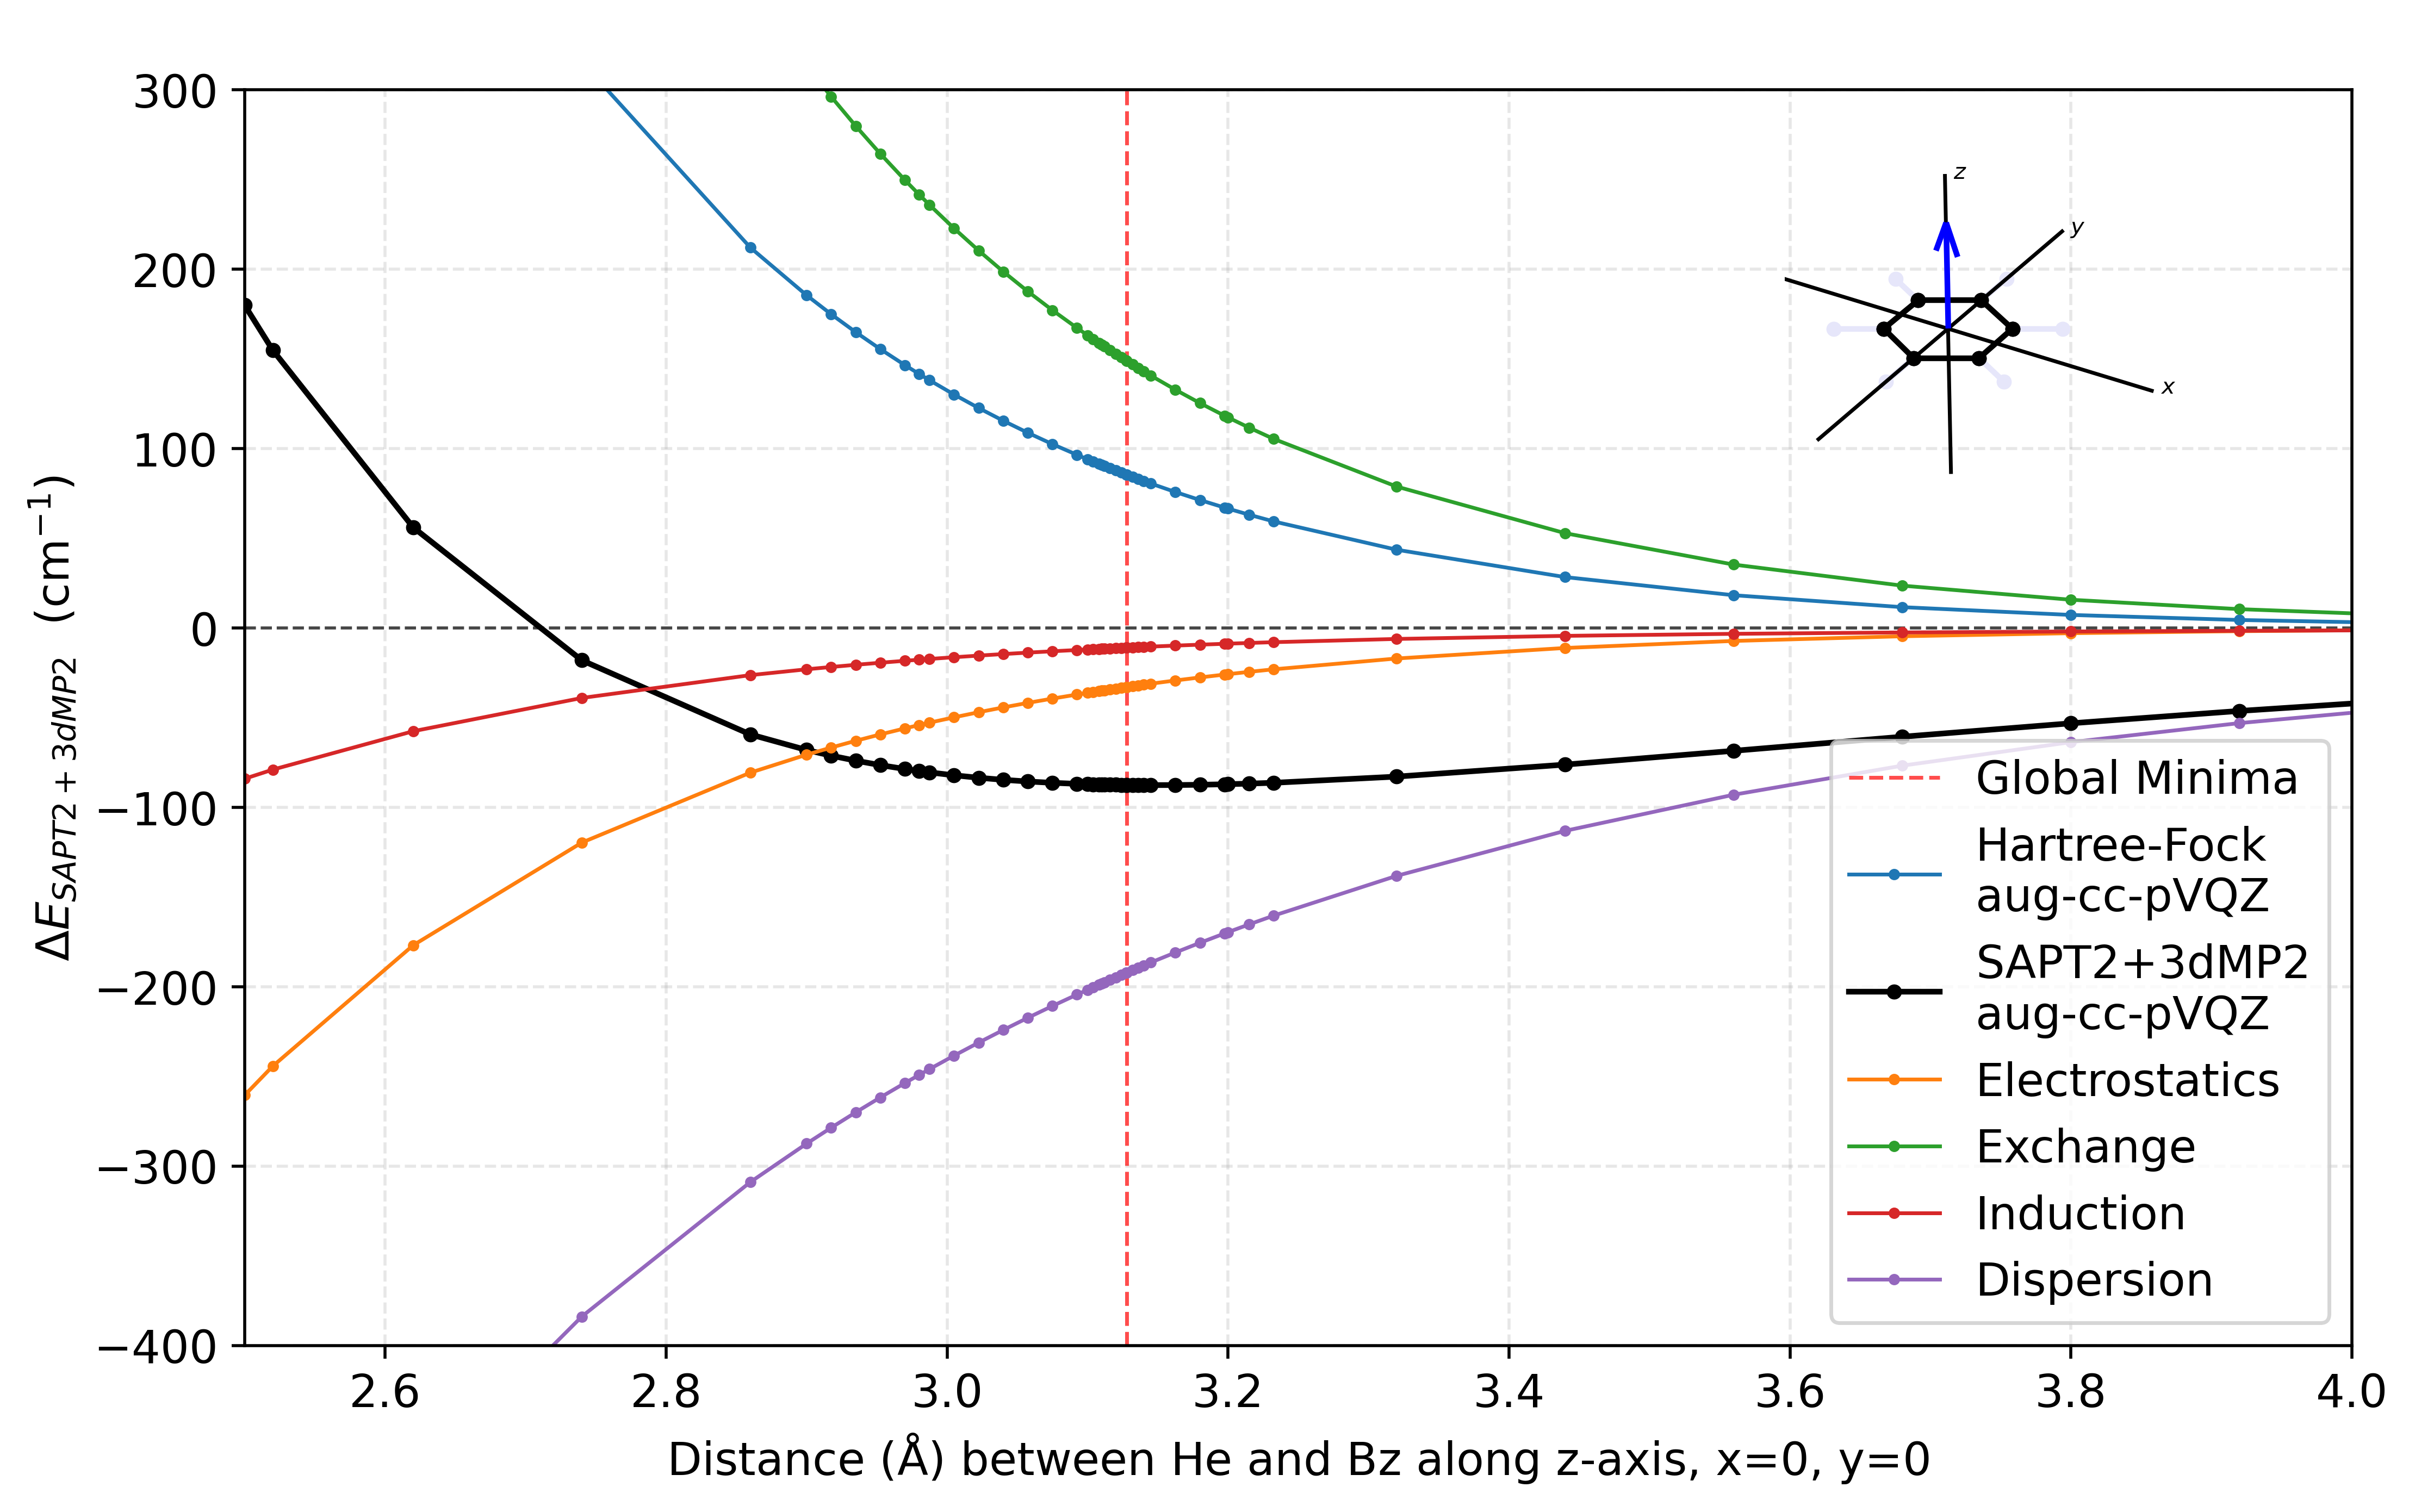

In [6]:
basis_set_curves = [
    {
        "y_data": hf_sorted,
        "label": "Hartree-Fock\naug-cc-pVQZ",
        "linewidth": line_width,
    },
    {
        "y_data": total_sorted,
        "label": "SAPT2+3dMP2\naug-cc-pVQZ",
        "linewidth": line_width * 1.5,
        "markersize": marker_size * 1.5,
        "color": "black",
    },
    {
        "y_data": electrostatics_sorted,
        "label": "Electrostatics",
        "linewidth": line_width,
    },
    {
        "y_data": exchange_sorted,
        "label": "Exchange",
        "linewidth": line_width,
    },
    {
        "y_data": induction_sorted,
        "label": "Induction",
        "linewidth": line_width,
    },
    {
        "y_data": dispersion_sorted,
        "label": "Dispersion",
        "linewidth": line_width,
    },
]


set_pub_style()

_, ax = plt.subplots(figsize=(10, 6), dpi=500)

ax.set_xlim(2.5, 4)
ax.set_ylim(-400, 300)
ax.axhline(0, color="black", linestyle="--", linewidth=0.8, alpha=0.7)


ax.axvline(
    3.128,
    color="red",
    linestyle="--",
    linewidth=1,
    alpha=0.7,
    label="Global Minima",
)

plot_curves_on_axis(
    ax,
    distances_sorted,
    basis_set_curves,
    r"Distance ($\mathrm{\AA}$) between He and Bz along z-axis, x=0, y=0",
    r"$\Delta E_{SAPT2+3dMP2}$" + f"  ({energy_unit[1]})",
    legend_loc="lower right",
)


quiver_args = (0, 0.01, 0, 0, 0, 7)
inset_position = [0.65, 0.65, 0.4, 0.4]
plot_inset_benzene(ax, inset_position, *quiver_args)

plt.savefig("sapt_decompose.pdf", format="pdf", bbox_inches='tight')

plt.show()